In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
# what cab companies are working

cab_data["Company"].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [5]:
# what cities are they operating in 

cab_data["City"].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [6]:
city.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [7]:
customer_id.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [8]:
transaction_id.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

#### Remove duplicate rows and NA values

In [9]:
cab_data.drop_duplicates()
cab_data.dropna()

city.drop_duplicates()
city.dropna()

customer_id.drop_duplicates()
customer_id.dropna()

transaction_id.drop_duplicates()
transaction_id.dropna()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


#### Merge all datasets into one for better overview

In [10]:
df = (transaction_id.merge(cab_data, on= 'Transaction ID')).merge(customer_id, on='Customer ID').merge(city, how="inner")

df.head(3)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,"814,885","24,701"
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,"814,885","24,701"
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,"814,885","24,701"


In [20]:
# Inserted new column of profits made with one transaction
df.insert(loc=9,
          column='Profit',
          value=df['Price Charged'] - df['Cost of Trip'])

# Inserted price of per KM of travel
df.insert(loc=6,
          column='Price per KM',
          value=df['Price Charged'] / df['KM Travelled'])

# Inserted price of per KM of travel
df.insert(loc=7,
          column='Profit per KM',
          value=df['Profit'] / df['KM Travelled'])

index = 0
for date in df['Date of Travel']:
    days_since_2016 = date - 42364
    if days_since_2016 >= 0 and days_since_2016 <= 335:
        df.at[index, 'Year'] = 2016
    elif days_since_2016 <= 700:
        df.at[index, 'Year'] = 2017
    else:
        df.at[index, 'Year'] = 2018
    index = index + 1
    
rides_count = df['Customer ID'].value_counts().rename_axis('Customer ID').reset_index(name='Number of Rides')
df = pd.merge(df, rides_count, on='Customer ID')

df

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,Price per KM,Profit per KM,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Income (USD/Month),Population,Users,Year,Number of Rides
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,12.182266,1.882266,30.45,370.95,313.6350,57.3150,Male,28,10813,"814,885",NaN,2016.0,3
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,22.859870,10.739870,26.19,598.70,317.4228,281.2772,Male,28,10813,"814,885",NaN,2018.0,3
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,18.614571,4.574571,42.55,792.05,597.4020,194.6480,Male,28,10813,"814,885",NaN,2018.0,3
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,12.526904,0.826904,28.62,358.52,334.8540,23.6660,Male,27,9237,"814,885",NaN,2016.0,4
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,19.821330,6.981330,36.38,721.10,467.1192,253.9808,Male,27,9237,"814,885",NaN,2018.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,43162,Yellow Cab,WASHINGTON DC,17.420052,3.740052,38.40,668.93,525.3120,143.6180,Female,29,6829,"418,859",NaN,2018.0,6
359388,10319775,51406,Cash,43203,Yellow Cab,WASHINGTON DC,18.935574,6.455574,3.57,67.60,44.5536,23.0464,Female,29,6829,"418,859",NaN,2018.0,6
359389,10347676,51406,Card,43287,Yellow Cab,WASHINGTON DC,14.150469,-0.249531,23.46,331.97,337.8240,-5.8540,Female,29,6829,"418,859",NaN,2018.0,6
359390,10358624,51406,Cash,43314,Yellow Cab,WASHINGTON DC,12.979348,-0.220652,27.60,358.23,364.3200,-6.0900,Female,29,6829,"418,859",NaN,2018.0,6


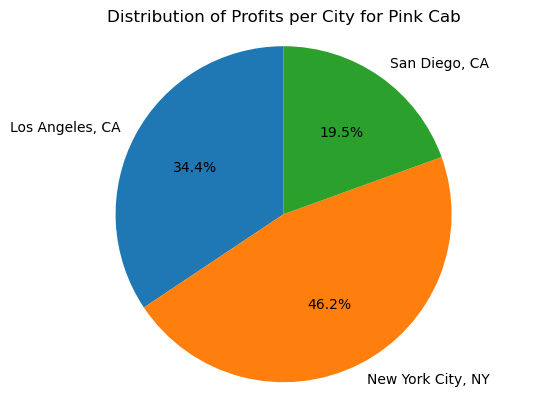

In [21]:
pink_LA = df.loc[(df['Company'] == 'Pink Cab') 
                                        & (df['City'] == 'LOS ANGELES CA'), 'Profit'].sum()

pink_NYC = df.loc[(df['Company'] == 'Pink Cab') 
                                        & (df['City'] == 'NEW YORK NY'), 'Profit'].sum()

pink_SD = df.loc[(df['Company'] == 'Pink Cab') 
                                        & (df['City'] == 'SAN DIEGO CA'), 'Profit'].sum()

pink_data = [pink_LA, pink_NYC, pink_SD]
pink_labels = ['Los Angeles, CA', 'New York City, NY', 'San Diego, CA']
plt.figure()
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per City for Pink Cab')
plt.axis('equal')

plt.show()

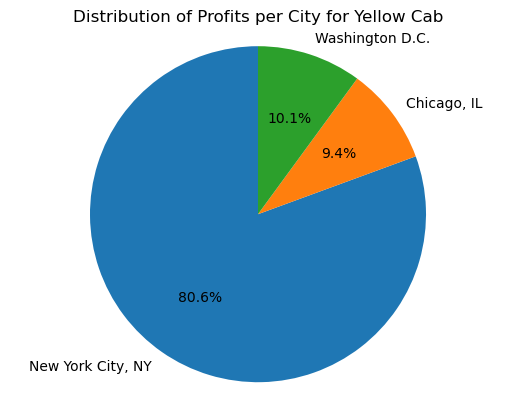

In [23]:
yellow_NYC = df.loc[(df['Company'] == 'Yellow Cab') 
                                        & (df['City'] == 'NEW YORK NY'), 'Profit'].sum()

yellow_CHI = df.loc[(df['Company'] == 'Yellow Cab') 
                                        & (df['City'] == 'CHICAGO IL'), 'Profit'].sum()

yellow_DC = df.loc[(df['Company'] == 'Yellow Cab') 
                                        & (df['City'] == 'WASHINGTON DC'), 'Profit'].sum()

yellow_data = [yellow_NYC, yellow_CHI, yellow_DC]
yellow_labels = ['New York City, NY', 'Chicago, IL', 'Washington D.C.']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per City for Yellow Cab')
plt.axis('equal')

plt.show()

Retained Customers:
 Company
Pink Cab       5775
Yellow Cab    15883
Name: Year, dtype: int64

Lost Customers:

 Company
Pink Cab      26555
Yellow Cab    24013
Name: Year, dtype: int64


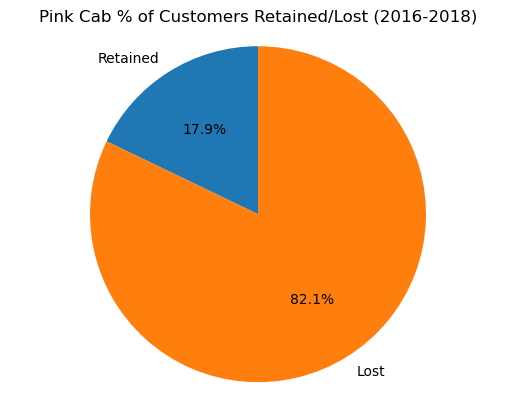

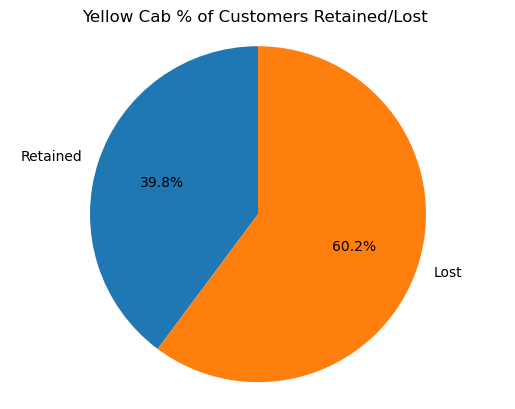

In [25]:
retained_customers = df.groupby(['Company', 'Customer ID'])['Year'].nunique()
retained_counts = retained_customers.groupby('Company').apply(lambda x: sum(x == 3))
lost_counts = retained_customers.groupby('Company').apply(lambda x: sum(x < 3))

print("Retained Customers:\n", retained_counts)
print("\nLost Customers:\n\n", lost_counts)


pink_data = [5775, 26555]
pink_labels = ['Retained', 'Lost']
plt.figure()
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pink Cab % of Customers Retained/Lost (2016-2018)')
plt.axis('equal')
plt.show()

yellow_data = [15883, 24013]
yellow_labels = ['Retained', 'Lost']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Yellow Cab % of Customers Retained/Lost ')
plt.axis('equal')
plt.show()

#### The data shows that the Pink Cab company was able to retain 17.9% of its customer base between the years 2016 and 2018 while the Yellow Cab company was able to retain 39.8% of its customers base between the years 2016 and 2018. 
#### This shows that the Yellow Cab company provided services that a higher percentage of their customers wanted to continue using. Additionally, this may indicate that the Yellow Cab company has better quality of services. Therefore, investing in the Yellow Cab company would be a good move.